# La gravitazione di Newton
In questo notebook sviluppiamo un codice per calcolare in modo approssimato orbite nel Sistema Solare, utilizzando la legge di gravitazione universale di Newton.

La forza gravitazionale tra due masse $m_1$ e $m_2$ ha le seguenti caratteristiche:
* è sempre attrattiva;
* è diretta lungo il segmento che congiunge le due masse;
* ha modulo

$$\left|\vec{F}\right| = G\frac{m_1m_2}{d^2}$$

dove $d$ è la distanza tra le due masse e $G = 6,67\cdot 10^{-11} Nm^2/kg^2$.

Se le due masse si trovano nelle posizioni $\vec{r_1} = (x_1, y_1)$ e $\vec{r_2} = (x_2, y_2)$, possiamo calcolare le componenti della forza che agisce sulla massa $m_1$ con i seguenti passi:

* il vettore con congiunge la massa $m_1$ con la massa $m_2$ è

$$ \vec{r_{12}} = \vec{r_2} - \vec{r_1} = (x_2-x_1; y_2-y_1)$$


$$\left|\vec{r_{12}}\right| = \sqrt{ (x_2-x_1)^2 + (y_2-y_1)^2} $$

* il versore (vettore con modulo unitario) che rappresenta la direzione e il verso dalla massa $m_1$ alla massa $m_2$

$$\hat{r_{12}} = \frac{\vec{r_{12}}}{\left|\vec{r_{12}}\right|} = \left(\frac{x_2-x_1}{\sqrt{ (x_2-x_1)^2 + (y_2-y_1)^2}}; \frac{y_2-y_1}{\sqrt{ (x_2-x_1)^2 + (y_2-y_1)^2}}\right) $$

* il modulo della forza è

$$\left|\vec{F}\right| = G\frac{m_1m_2}{\left|\vec{r_{12}}\right|^2} = G\frac{m_1m_2}{ (x_2-x_1)^2 + (y_2-y_1)^2}$$

* le componenti della forza $\vec{F}$ sono

$$\vec{F} = \left|\vec{F}\right|\hat{r_{12}} $$


$$F_x = \left|\vec{F}\right|\hat{r_{12}}_x= G \frac{m_1m_2}{[(x_2-x_1)^2 + (y_2-y_1)^2]^{3/2}}\cdot(x_2-x_1) $$


$$F_y = \left|\vec{F}\right|\hat{r_{12}}_y = G \frac{m_1m_2}{[(x_2-x_1)^2 + (y_2-y_1)^2]^{3/2}}\cdot(y_2-y_1) $$

Utilizzando la seconda legge di Newton, possiamo calcolare l'accelerazione della massa $m_1$

$$a_x = \frac{F_x}{m_1} = G \frac{m_2}{[(x_2-x_1)^2 + (y_2-y_1)^2]^{3/2}}\cdot(x_2-x_1)$$


$$a_y = \frac{F_y}{m_1} = G \frac{m_2}{[(x_2-x_1)^2 + (y_2-y_1)^2]^{3/2}}\cdot(y_2-y_1)$$

Nel seguito, per semplicità, supponiamo che $\vec{r_2} = 0$ e, quindi, $x_2 = 0$ e $y_2 = 0$:

$$a_x = \frac{F_x}{m_1} = G \frac{m_2}{[(x_1)^2 + (y_1)^2]^{3/2}}\cdot(-x_1)$$


$$a_y = \frac{F_y}{m_1} = G \frac{m_2}{[(x_1)^2 + (y_1)^2]^{3/2}}\cdot(-y_1)$$

Con queste equazioni possiamo applicare il metodo di Eulero e integrare la legge oraria.

Il seguente codice contiene le principali costanti astronomiche e funzioni che calcolano il modulo e le componenti della forza di gravitazione.

In [1]:
import numpy as np

# Unità del S.I.
G = 6.67e-11
M_sun = 1.989e30
M_earth = 5.972e24
R_earth = 6.371e6
AU = 1.5e11
yr = 365.25*24*3600

def f_grav(m1, m2, x, y):
    d = np.sqrt(x**2+y**2)
    FG = G*m1*m2/d**2
    FGx = -FG*x/d
    FGy = -FG*y/d
    return FG, FGx, FGy

m = 70
F, Fx, Fy = f_grav(M_earth, m, R_earth, 0)

print(f"Il peso di una persona di {m}kg è {F:.2f}N")


Il peso di una persona di 70kg è 686.96N


## Integrazione dell'orbita con il metodo di Eulero
Ora possiamo integrare l'orbita, usando le seguenti equazioni:
$$\begin{cases}
a_x = \frac{F_x}{m_2} \\
a_y = \frac{F_y}{m_2} \\
\frac{\Delta v_x}{\Delta t} = a_x\\
\frac{\Delta v_y}{\Delta t} = a_y\\
\frac{\Delta x_1}{\Delta t} = v_x\\
\frac{\Delta y_1}{\Delta t} = v_y\\
\end{cases}$$

se discretizziamo il tempo otteniamo

$$\begin{cases}
x_1(t_{n+1}) = x_1(t_n) + v_x(t_n)\cdot \Delta t\\
y_1(t_{n+1}) = y_1(t_n) + v_y(t_n)\cdot \Delta t\\
v_x(t_{n+1}) = v_x(t_n) + a_x\cdot \Delta t\\
v_y(t_{n+1}) = v_y(t_n) + a_y\cdot \Delta t\\
\end{cases}$$

Ovviamente, per poter integrare l'orbita abbiamo bisogno delle condizioni iniziali:

$$\begin{cases}
x_1(t_0) = x_{1, 0}\\
y_1(t_0) = y_{1, 0}\\
v_x(t_0) = v_{x, 0}\\
v_y(t_0) = v_{y, 0}
\end{cases}$$

La seguente funzione integra le equazioni di Eulero

In [2]:
def integra_orbita(x0, y0, vx0, vy0, delta_t, t_max, m1, m2):
    # liste con memoria dell'orbita
    x_list = []
    y_list = []
    
    # Inizializzazione
    x, y, vx, vy = x0, y0, vx0, vy0
    t = 0
    
    # Integrazione di Eulero
    while t < t_max:
        x_list.append(x)
        y_list.append(y)
        
        # Calcolo accelerazione (m1 si semplifica)
        F, Fx, Fy = f_grav(m1, m2, x, y)
        ax, ay = Fx/m1, Fy/m1
        
        # Aggiornamento posizione e velocità
        x = x + vx*delta_t
        y = y + vy*delta_t
        vx = vx + ax*delta_t
        vy = vy + ay*delta_t
        
        t = t + delta_t

    return x_list, y_list

### L'orbita della Terra
Testiamo il codice e vediamo se riproduce correttamente l'orbita della Terra. Approssimiamo l'orbita della Terra a un'orbita circolare (l'eccentricità dell'orbita è 0,0167). Il raggio dell'orbita è $R = 1AU$ e il periodo è $T = 1yr$, quindi la velocità è
$$v = \frac{2\pi R}{T}$$

In [3]:
v = 2*np.pi*AU/yr
print(f"La velocità della Terra è {v:.2f}m/s")

La velocità della Terra è 29865.32m/s


Il seguente codice integra l'orbita della Terra e la rappresenta graficamente. Nota che l'orbita non si chiude, perché non stiamo tenendo conto dell'eccentricità.

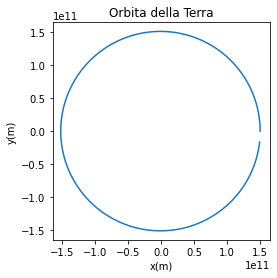

In [4]:
from matplotlib import pyplot as plt

# Nota che se y0 = 0 allora vx0 = 0
x0 = 1.0*AU
y0 = 0
vx0 = 0
vy0 = 2*np.pi*AU/yr
t_max = 1.0*yr

# Numero di step di integrazione
# Va aumentato finchè la soluzione non rimane stabile
# e si raggiunge una convergenza
N_step = 100000
delta_t = t_max/N_step

# m1 è irrilevante
m1 = M_earth
m2 = M_sun

x_l, y_l = integra_orbita(x0, y0, vx0, vy0, delta_t, t_max, m1, m2)

# grafico
plt.plot(x_l, y_l)

plt.axis("square")
plt.axis([-1.1*AU, 1.1*AU, -1.1*AU, 1.1*AU])

plt.title("Orbita della Terra")
plt.xlabel("x(m)")
plt.ylabel("y(m)")

plt.show()

## Risolvere l'orbita di una cometa
Le comete sono oggetti del Sistema Solare che hanno orbite estremamente eccentriche. Ad esempio, la cometa di Halley ha eccentricità

$$e = 0,967$$

e semiasse maggiore

$$a = 17,834 AU$$.

Possiamo calcolare la distanza focale

$$c = e\cdot a$$

e la distanza di afelio $x_a$ e perielio $x_p$ dal fuoco dell'orbita (che è la posizione del Sole)

$$x_a = c + a$$
$$x_p = a-c$$

Il seguente codice esegue questi calcoli.

In [5]:
e = 0.967142908462304
a = 17.83414429255373*AU
c = e*a
xa =c+a
xp = a-c

print(f"La cometa di Halley ha afelio {xa/AU:.2f}AU e perielio {xp/AU:.2f}AU")

La cometa di Halley ha afelio 35.08AU e perielio 0.59AU


Per integrare l'orbita, abbiamo bisogno di conoscere una velocità iniziale. Possiamo calcolare la velocità nell'afelio $v_a$ e nel perielio $v_p$ se imponiamo la conservazione del momento angolare e la conservazione dell'energia:

$$\begin{cases}
mv_ax_a = mv_px_p\\
\frac{1}{2}mv_a^2 -G\frac{mM}{x_a} = \frac{1}{2}mv_p^2 - G\frac{mM}{x_p}
\end{cases}$$

Il sistema è un sistema in due equazioni con due incognite $v_a$ e $v_p$, quindi possiamo risolverlo

$$\begin{cases}
v_a = \sqrt{2GM\frac{x_p}{x_a(x_p+x_a)}}\\
v_p = \sqrt{2GM\frac{x_a}{x_p(x_p+x_a)}}\\
\end{cases}$$

Il seguente codice calcola queste velocità.

In [6]:
va = np.sqrt(2*G*M_sun*xp/(xa*(xp+xa)))
vp = np.sqrt(2*G*M_sun*xa/(xp*(xp+xa)))

print(f"La cometa di Halley ha  va = {va:.2f}m/s e vp = {vp:.2f}m/s")

La cometa di Halley ha  va = 910.13m/s e vp = 54489.39m/s


Possiamo ora integrare l'orbita della cometa. Il periodo della cometa di Halley è 76 anni.

La velocità massima raggiunta dalla cometa di Halley è molto elevata, quindi per ottenere una convergenza dobbiamo usare un valore di $\Delta t$ molto piccolo: il codice è innefficiente e richiede alcuni minuti di tempo.

Tempo impiegato a integrare l'orbita: 65s


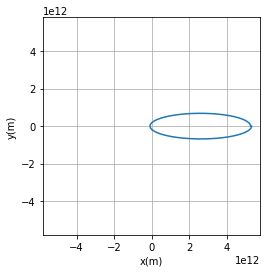

La distanza teorica del perielio è 0.5860AU
La distanza del perielio calcolata è -0.5861AU


In [8]:
from matplotlib import pyplot as plt
import time

# misuriamo il tempo impiegato per integrare
t_start = time.perf_counter()

x0 = xa
y0 = 0
vx0 = 0
vy0 = va
t_max = 76*yr

N_step = 10000000
delta_t = t_max/N_step

# La massa della cometa non è rilevante
m1 = 1.
m2 = M_sun

x_l, y_l = integra_orbita(x0, y0, vx0, vy0, delta_t, t_max, m1, m2)

# fine del tempo impiegato per integrare
# il resto del tempo di esecuzione serve per il grafico
t_end = time.perf_counter()

print(f"Tempo impiegato a integrare l'orbita: {t_end-t_start:.0f}s")

plt.plot(x_l, y_l)

plt.axis("square")
plt.axis([-1.1*xa, 1.1*xa, -1.1*xa, 1.1*xa])

plt.xlabel("x(m)")
plt.ylabel("y(m)")

plt.grid()
plt.show()

# Verifichiamo se il calcolo dell'orbita è corretto
print(f"La distanza teorica del perielio è {xp/AU:.4f}AU")
print(f"La distanza del perielio calcolata è {min(x_l)/AU:.4f}AU")